In [ ]:
### REF
#Amazon Review Sentiment Analysis Prediction
#problems 
"""
1. Identify custom topics
2. Automatic topic grouping
3. Sentiment analysis
4. Discover trends
5. Improve customer support
6. Identity issues
7. Manage brand reputation
8. Competitor intelligence
9. Product enhancements 
10. Review metrics
"""

#solution
"""Amazon review analysis can help brands identify topics, subtopics, and aspects for which there 
can be not only negative and positive feelings but also split emotions expressed.
hese machine learning tasks then automatically group these topics into custom categories like
convenience, sturdiness, easy-of-use, etc.
Mining the emotions from reviews is what makes Amazon review analysis a more holistic approach
than just numerical analysis. 
"""

### Library

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

import nltk
from nltk import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('../input/amazon-product-reviews/Reviews.csv')

In [3]:
print(df.shape)
df.head(3)

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [4]:
# for all data is too heavy, make it slim by chose
df2 = df.sample(frac= 0.20,replace = True).reset_index(drop = True)

print(df2.shape)
df2.head()

(113691, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,528047,B004QLX0LA,A2J8UVU3BOQ7HA,Tiffany K,6,6,4,1315872000,The Only Food That Works on a Sensitive Stomach,I have tried many foods with my dog's sensitiv...
1,35825,B000LKXJEI,AWX2C6PPAMFX0,Melissa,1,2,2,1298851200,Warning: These smell and taste like dog food :(,"I am a vegetarian, and I wanted so badly to li..."
2,189389,B001EO5Q64,A3JBVPFVM061IN,Pheann,2,2,5,1297123200,Nutiva Coconut Oil,It was nicely packaged and arrived very quickl...
3,464455,B000UBD88A,A3HQ03VWC4T4OE,Oddie,0,0,2,1325980800,Is this Senseo for reals?,This was our second order of Senseo Dark Roast...
4,126284,B000F8GWRM,A1WWPVZOH2ACQD,E. Loiselle,1,1,1,1311811200,"Tastes fine, makes you sick in your gut!",I ate most of these in a small bag. I had the ...


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113691 entries, 0 to 113690
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      113691 non-null  int64 
 1   ProductId               113691 non-null  object
 2   UserId                  113691 non-null  object
 3   ProfileName             113688 non-null  object
 4   HelpfulnessNumerator    113691 non-null  int64 
 5   HelpfulnessDenominator  113691 non-null  int64 
 6   Score                   113691 non-null  int64 
 7   Time                    113691 non-null  int64 
 8   Summary                 113682 non-null  object
 9   Text                    113691 non-null  object
dtypes: int64(5), object(5)
memory usage: 8.7+ MB


In [6]:
print(df2.isna().sum())
df2.dropna(inplace= True)
df2.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               3
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   9
Text                      0
dtype: int64


Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

What is the distribution of ratings across dataset

In [7]:
print(df2['Score'].value_counts())
rating_pct = df2['Score'].value_counts()/len(df) * 100
rating_pct

5    72491
4    16363
1    10326
3     8429
2     6070
Name: Score, dtype: int64


5    12.752307
4     2.878509
1     1.816506
3     1.482794
2     1.067808
Name: Score, dtype: float64

### ditsributoin review(score)

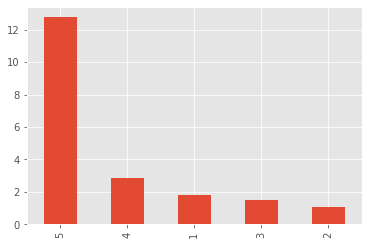

In [8]:
rating_pct.plot.bar()
plt.show()

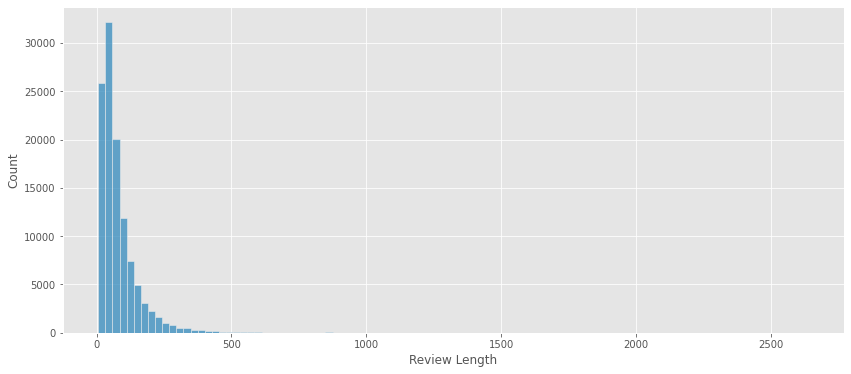

In [9]:
#words per review
plt.figure(figsize = (14,6))
WordsPerReview = df2['Text'].apply(lambda x: len(x.split(' ')))

sns.histplot(WordsPerReview,bins = 100)

plt.xlabel('Review Length')
plt.show()

### Word cloud

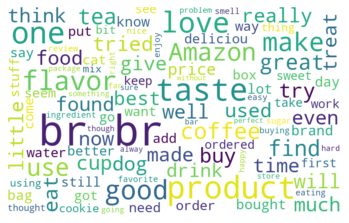

In [10]:
# all reivie joint into 1 sentence
txt = ' '.join(review for review in df2.Text)

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

#### Data Preprocessing and Transformation

In [11]:
df2 = pd.DataFrame(df2,columns = ['Score','Text'])
df2.rename(columns = {'Score':'Rating','Text':'Review'},inplace = True)

In [12]:
def apply_sentiment(Rating):
    if(Rating <=2 ):
        return 0
    else:
        return 1

In [13]:
df2['Sentiment'] = df2['Rating'].apply(apply_sentiment)
df2.drop(['Rating'],axis = 1, inplace = True)

In [14]:
sentiment = df2['Sentiment'].value_counts()
sentiment

1    97283
0    16396
Name: Sentiment, dtype: int64

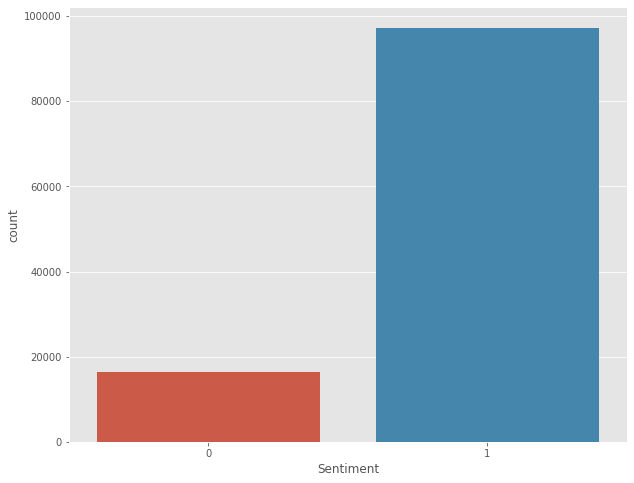

In [15]:
plt.figure(figsize = ( 10,8))
sns.countplot(data = df2, x = 'Sentiment')
plt.show()

In [16]:
def clean_text(Review):
   
    Review = str(Review).lower() # convert to lowercase
    Review = re.sub('\[.*?\]', '', Review) 
    Review = re.sub('https?://\S+|www\.\S+', '', Review) # Remove URls
    Review = re.sub('<.*?>+', '', Review)
    Review = re.sub(r'[^a-z0-9\s]', '', Review) # Remove punctuation
    Review = re.sub('\n', '', Review)
    Review = re.sub('\w*\d\w*', '', Review)
    return Review

In [17]:
df2['Review']

0         I have tried many foods with my dog's sensitiv...
1         I am a vegetarian, and I wanted so badly to li...
2         It was nicely packaged and arrived very quickl...
3         This was our second order of Senseo Dark Roast...
4         I ate most of these in a small bag. I had the ...
                                ...                        
113686    I bought this product for my boyfriend who abs...
113687    I was looking for a product with some powerful...
113688    I bought a 2-pack of the chicken flavored Ever...
113689    My Maltese loves the small bite kibble and fla...
113690    This product is delicious and so easy and fast...
Name: Review, Length: 113679, dtype: object

In [18]:
df2['Review'] = df2['Review'].apply(clean_text)

In [19]:
df2.head()

,Review,Sentiment
0,i have tried many foods with my dogs sensitive...,1
1,i am a vegetarian and i wanted so badly to lik...,0
2,it was nicely packaged and arrived very quickl...,1
3,this was our second order of senseo dark roast...,0
4,i ate most of these in a small bag i had the w...,0


In [20]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stopword = []
sentence = df2['Review'][0]


#words = nltk.word_tokenize(sentence)


def remove_stopword(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

df2['reviews_text'] = df2['Review'].apply(lambda row: remove_stopword(stop_words, row))

## need to convert list into string
df2['reviews_text'] = df2['reviews_text'].apply(lambda row: ','.join(row))

In [21]:
df2.head(3)

,Review,Sentiment,reviews_text
0,i have tried many foods with my dogs sensitive...,1,"tried,many,foods,dogs,sensitive,stomach,limite..."
1,i am a vegetarian and i wanted so badly to lik...,0,"vegetarian,wanted,badly,like,vegan,jerky,soon,..."
2,it was nicely packaged and arrived very quickl...,1,"nicely,packaged,arrived,quickly,product,also,g..."


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
    ])

In [23]:
X = df2['reviews_text']
y = df2['Sentiment']


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,
                                                   test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape

((90943,), (22736,), (90943,))

In [25]:
fit_model = clf.fit(X_train,y_train)

In [26]:
y_pred = clf.predict(X_test)

In [27]:
print('Training accuracy:', fit_model.score(X_train,y_train))
print('Test accuracy:', fit_model.score(X_test,y_test))

Training accuracy: 0.8587027038914485
Test accuracy: 0.854371921182266


In [28]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.01      0.01      3326
           1       0.85      1.00      0.92     19410

    accuracy                           0.85     22736
   macro avg       0.87      0.50      0.47     22736
weighted avg       0.86      0.85      0.79     22736

[[   17  3309]
 [    2 19408]]
